In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Actividad 4

## Parte 1

In [56]:
dataframe = pd.read_csv('Wholesale customers data.csv')

In [57]:
dataframe

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [58]:
# Añadir columna "Spending" con los gastos totales por fila
dataframe['Spending'] = dataframe[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)
dataframe

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Spending
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302
436,1,3,39228,1431,764,4510,93,2346,48372
437,2,3,14531,15488,30243,437,14841,1867,77407
438,1,3,10290,1981,2232,1038,168,2125,17834


In [59]:
#  Generar una columna que sume el gasto total por cada renglón
n_by_region = dataframe.groupby('Region').size().rename('Total')
n_by_region

Region
1     77
2     47
3    316
Name: Total, dtype: int64

In [60]:
# Generar el total de gastos por región y por canal
total_by_region = dataframe.groupby(['Region', 'Channel']).sum()
total_by_region

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
1      1         761233   228342   237542  184512             56081   
       2          93600   194112   332495   46514            148055   
2      1         326215    64519   123074  160861             13516   
       2         138506   174625   310200   29271            159795   
3      1        2928269   735753   820101  771606            165990   
       2        1032308  1153006  1675150  158886            724420   

                Delicassen  Spending  
Region Channel                        
1      1             70632   1538342  
       2             33695    848471  
2      1             30965    719150  
       2             23541    835938  
3      1            320358   5742077  
       2            191752   4935522

In [61]:
# Mostrar el total de lo que se gastó de leche por región,
total_by_region_milk = dataframe.groupby(['Region']).sum()['Milk']
total_by_region_milk

Region
1     422454
2     239144
3    1888759
Name: Milk, dtype: int64

In [62]:
# Mostrar el total de lo que se gastó de abarrotes por canal
total_by_channel_grocery = dataframe.groupby(['Channel']).sum()['Grocery']
total_by_channel_grocery

Channel
1    1180717
2    2317845
Name: Grocery, dtype: int64

## Parte 2


In [63]:
df = pd.read_csv('retail_data.csv')

In [64]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          100 non-null    int64  
 1   Age                 90 non-null     float64
 2   Total Spend         90 non-null     float64
 3   Purchase Frequency  90 non-null     float64
 4   PurchaseDate        100 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB
None


In [65]:
print("\nFirst Few Rows of Data:")
print(df.head())


First Few Rows of Data:
   CustomerID   Age  Total Spend  Purchase Frequency PurchaseDate
0           1  61.0       1873.0                23.0   2023-11-11
1           2  42.0       3601.0                 7.0   2023-08-08
2           3  20.0       4613.0                22.0   2023-12-26
3           4  35.0       3015.0                 3.0   2023-02-02
4           5  52.0       1336.0                26.0   2023-10-27


In [66]:
# Basic statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       CustomerID        Age  Total Spend  Purchase Frequency
count  100.000000  90.000000    90.000000           90.000000
mean    50.500000  44.244444  3006.166667           16.244444
std     29.011492  15.290675  1291.496251            7.834397
min      1.000000  18.000000   645.000000            3.000000
25%     25.750000  29.500000  1909.000000            9.250000
50%     50.500000  45.500000  3091.500000           16.000000
75%     75.250000  58.750000  4206.750000           23.000000
max    100.000000  69.000000  4992.000000           28.000000


In [67]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID             0
Age                   10
Total Spend           10
Purchase Frequency    10
PurchaseDate           0
dtype: int64


In [68]:
# Unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in PurchaseDate:
PurchaseDate
2023-06-15    4
2023-10-26    4
2023-11-11    2
2023-01-20    2
2023-01-31    2
             ..
2023-05-16    1
2023-05-09    1
2023-10-21    1
2023-12-05    1
2023-05-31    1
Name: count, Length: 86, dtype: int64


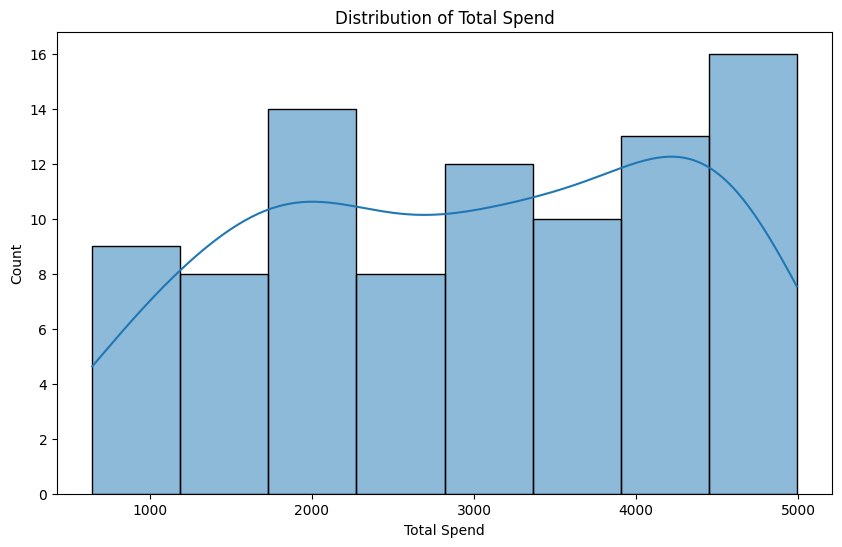

In [69]:
# Visualize the distribution of a numerical column (e.g., 'Total Spend')
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Spend'], kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Count')
plt.show()

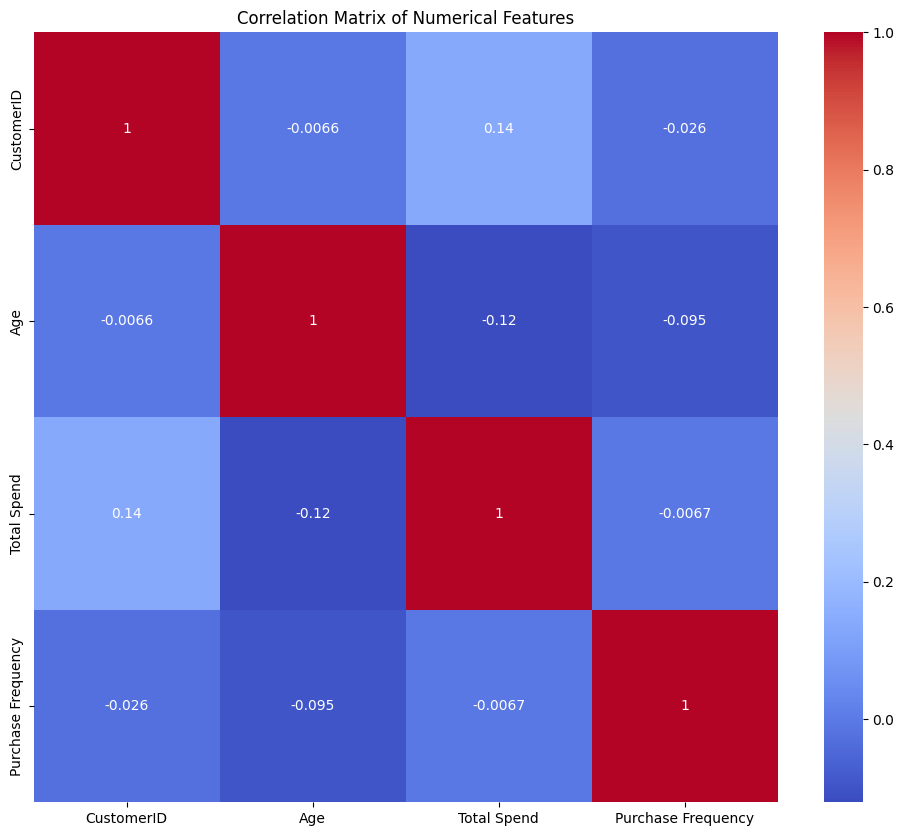

In [70]:
# Correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [71]:
df = pd.read_csv('retail_data.csv')

In [72]:
# Convert 'PurchaseDate' to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [73]:
# Calculate Recency
most_recent_date = df['PurchaseDate'].max()
df['Recency'] = (most_recent_date - df['PurchaseDate']).dt.days

In [74]:
# Calculate the last purchase date per customer
recency_df = df.groupby('CustomerID')['Recency'].min().reset_index()

In [75]:
# Merge Recency back to main dataset
df = df.merge(recency_df, on='CustomerID', suffixes=('', '_Overall'))

In [76]:
# Display the first few rows with the new Recency feature
print("\nData with Recency Feature:")
print(df[['CustomerID', 'PurchaseDate', 'Recency_Overall']].head())


Data with Recency Feature:
   CustomerID PurchaseDate  Recency_Overall
0           1   2023-11-11               50
1           2   2023-08-08              145
2           3   2023-12-26                5
3           4   2023-02-02              332
4           5   2023-10-27               65


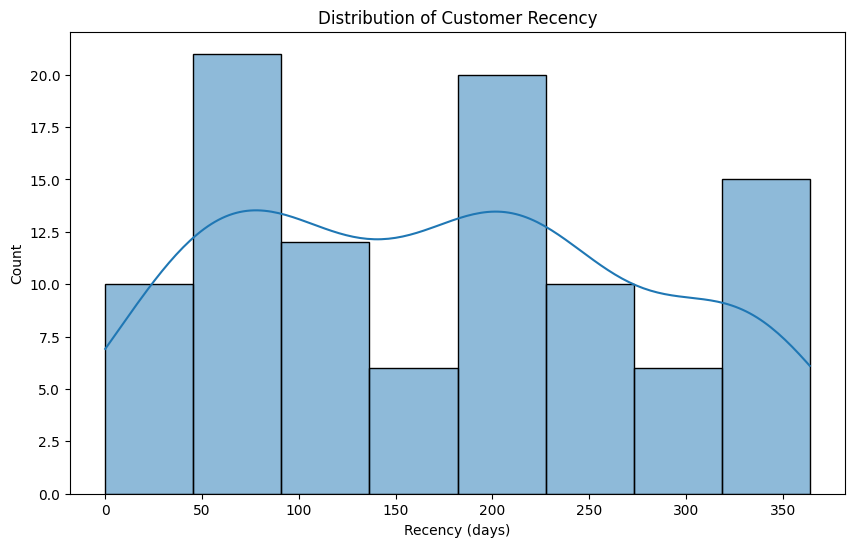

In [77]:
# Visualize the distribution of Recency
plt.figure(figsize=(10, 6))
sns.histplot(df['Recency_Overall'], kde=True)
plt.title('Distribution of Customer Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Count')
plt.show()

In [78]:
# Calculate additional statistics
avg_recency = df['Recency_Overall'].mean()
median_recency = df['Recency_Overall'].median()
max_recency = df['Recency_Overall'].max()

print(f"\nAverage Recency: {avg_recency:.2f} days")
print(f"Median Recency: {median_recency:.2f} days")
print(f"Maximum Recency: {max_recency:.2f} days")


Average Recency: 172.59 days
Median Recency: 183.00 days
Maximum Recency: 364.00 days


In [79]:
# Identify customers with high recency (potential churn risk)
high_recency_threshold = df['Recency_Overall'].quantile(0.75)  # 75th percentile
high_recency_customers = df[df['Recency_Overall'] > high_recency_threshold]

print(f"\nNumber of customers with high recency (potential churn risk): {len(high_recency_customers)}")


Number of customers with high recency (potential churn risk): 25


In [80]:
# Correlation between Recency and other features (if available)
if 'TotalSpend' in df.columns:
    correlation = df['Recency_Overall'].corr(df['TotalSpend'])
    print(f"\nCorrelation between Recency and Total Spend: {correlation:.2f}")

In [81]:
# Save the updated dataset
df.to_csv('retail_data_with_recency.csv', index=False)
print("\nUpdated dataset saved as 'retail_data_with_recency.csv'")


Updated dataset saved as 'retail_data_with_recency.csv'
